#Stock_Price_Prediction

PROJECT BY:

CB.EN.U4CSE20218

CB.EN.U4CSE20219

CB.EN.U4CSE20221

CB.EN.U4CSE20244

CB.EN.U4CSE20265

#IMPORTING MODULES

In [677]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns

In [678]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [679]:
df = pd.read_csv("/content/drive/MyDrive/zyne.us.txt",parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2015-08-05,18.00,22.2500,15.5000,16.25,1535500,0
1,2015-08-06,16.48,19.5000,16.4600,19.32,331692,0
2,2015-08-07,19.31,24.9000,19.3100,24.54,269300,0
3,2015-08-10,29.70,42.8500,27.5000,35.14,539200,0
4,2015-08-11,35.98,37.6880,28.1600,29.73,243632,0
...,...,...,...,...,...,...,...
569,2017-11-06,10.42,11.5400,10.4200,11.19,977948,0
570,2017-11-07,11.30,11.4200,10.6700,10.83,451210,0
571,2017-11-08,10.70,11.0600,10.3500,10.90,336449,0
572,2017-11-09,11.00,11.8563,10.9700,11.60,463067,0


#EXPOLARATORY DATA ANALYSIS

In [680]:
df.shape

(574, 7)

In [681]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,574.000000,574.00000,574.000000,574.000000,5.740000e+02,574.0
mean,13.584548,14.16217,12.998530,13.526147,3.639375e+05,0.0
std,5.985249,6.36847,5.647351,5.944354,8.045633e+05,0.0
min,4.750000,5.40000,4.640000,4.990000,1.265400e+04,0.0
25%,8.910000,9.36875,8.602500,8.860000,1.091920e+05,0.0
50%,12.805000,13.38500,12.355000,12.795000,2.144885e+05,0.0
75%,18.220000,18.80000,17.810000,18.167500,3.817345e+05,0.0
max,37.980000,43.00000,33.680000,36.490000,1.363256e+07,0.0


In [682]:
df.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [683]:
df.Open.value_counts() 

6.26     4
14.50    4
6.20     4
9.95     4
9.60     4
        ..
7.67     1
8.13     1
8.94     1
9.34     1
11.68    1
Name: Open, Length: 459, dtype: int64

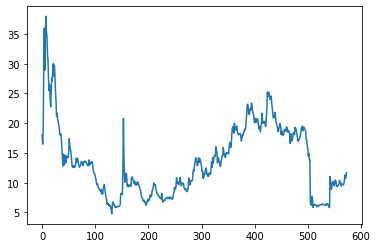

In [684]:
df.Open.plot(kind="line");

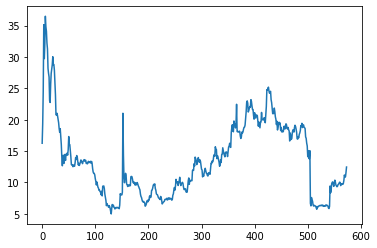

In [685]:
df.Close.plot(kind="line",x=None);

In [686]:
df.info

<bound method DataFrame.info of           Date   Open     High      Low  Close   Volume  OpenInt
0   2015-08-05  18.00  22.2500  15.5000  16.25  1535500        0
1   2015-08-06  16.48  19.5000  16.4600  19.32   331692        0
2   2015-08-07  19.31  24.9000  19.3100  24.54   269300        0
3   2015-08-10  29.70  42.8500  27.5000  35.14   539200        0
4   2015-08-11  35.98  37.6880  28.1600  29.73   243632        0
..         ...    ...      ...      ...    ...      ...      ...
569 2017-11-06  10.42  11.5400  10.4200  11.19   977948        0
570 2017-11-07  11.30  11.4200  10.6700  10.83   451210        0
571 2017-11-08  10.70  11.0600  10.3500  10.90   336449        0
572 2017-11-09  11.00  11.8563  10.9700  11.60   463067        0
573 2017-11-10  11.68  13.1500  11.3043  12.46   885587        0

[574 rows x 7 columns]>

In [687]:
df.sample()

,Date,Open,High,Low,Close,Volume,OpenInt
209,2016-06-03,9.11,9.79,8.7966,9.51,414088,0


In [688]:
df.loc[2]

Date       2015-08-07 00:00:00
Open                     19.31
High                      24.9
Low                      19.31
Close                    24.54
Volume                  269300
OpenInt                      0
Name: 2, dtype: object

In [689]:
df.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2015-08-05,18.00,22.250,15.50,16.25,1535500,0
1,2015-08-06,16.48,19.500,16.46,19.32,331692,0
2,2015-08-07,19.31,24.900,19.31,24.54,269300,0
3,2015-08-10,29.70,42.850,27.50,35.14,539200,0
4,2015-08-11,35.98,37.688,28.16,29.73,243632,0
5,2015-08-12,28.91,36.000,28.00,32.05,238000,0
6,2015-08-13,35.00,43.000,32.52,36.49,407800,0
7,2015-08-14,37.98,39.500,33.68,34.84,233000,0
8,2015-08-17,35.42,36.300,32.04,34.11,124000,0
9,2015-08-18,34.72,34.720,31.45,32.22,141500,0


In [690]:
df.tail(10)

,Date,Open,High,Low,Close,Volume,OpenInt
564,2017-10-30,9.80,10.2699,9.6300,9.76,256138,0
565,2017-10-31,9.74,9.9492,9.6300,9.80,233242,0
566,2017-11-01,9.70,9.9300,9.4100,9.69,301604,0
567,2017-11-02,9.59,10.2000,9.5100,9.85,323496,0
568,2017-11-03,9.83,10.5000,9.8300,10.33,531495,0
569,2017-11-06,10.42,11.5400,10.4200,11.19,977948,0
570,2017-11-07,11.30,11.4200,10.6700,10.83,451210,0
571,2017-11-08,10.70,11.0600,10.3500,10.90,336449,0
572,2017-11-09,11.00,11.8563,10.9700,11.60,463067,0
573,2017-11-10,11.68,13.1500,11.3043,12.46,885587,0


In [691]:
df.isnull().any()

Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [692]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [693]:
features=['Open','High','Low','Close','Volume']
features

['Open', 'High', 'Low', 'Close', 'Volume']

In [694]:
df['Date'].unique()

array(['2015-08-05T00:00:00.000000000', '2015-08-06T00:00:00.000000000',
       '2015-08-07T00:00:00.000000000', '2015-08-10T00:00:00.000000000',
       '2015-08-11T00:00:00.000000000', '2015-08-12T00:00:00.000000000',
       '2015-08-13T00:00:00.000000000', '2015-08-14T00:00:00.000000000',
       '2015-08-17T00:00:00.000000000', '2015-08-18T00:00:00.000000000',
       '2015-08-19T00:00:00.000000000', '2015-08-20T00:00:00.000000000',
       '2015-08-21T00:00:00.000000000', '2015-08-24T00:00:00.000000000',
       '2015-08-25T00:00:00.000000000', '2015-08-26T00:00:00.000000000',
       '2015-08-27T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-08-31T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-09-02T00:00:00.000000000', '2015-09-03T00:00:00.000000000',
       '2015-09-04T00:00:00.000000000', '2015-09-08T00:00:00.000000000',
       '2015-09-09T00:00:00.000000000', '2015-09-10T00:00:00.000000000',
       '2015-09-11T00:00:00.000000000', '2015-09-14

In [695]:
df['Open'].unique()

array([18.    , 16.48  , 19.31  , 29.7   , 35.98  , 28.91  , 35.    ,
       37.98  , 35.42  , 34.72  , 31.6   , 30.43  , 27.23  , 25.5   ,
       26.51  , 24.    , 22.75  , 25.11  , 27.61  , 27.12  , 29.    ,
       30.    , 27.93  , 29.76  , 28.3   , 25.55  , 23.9   , 21.22  ,
       21.65  , 20.61  , 20.48  , 19.73  , 18.12  , 18.03  , 18.22  ,
       17.6   , 15.92  , 14.52  , 12.8   , 14.8   , 12.93  , 13.13  ,
       14.61  , 14.36  , 13.33  , 14.5   , 14.19  , 14.2   , 14.23  ,
       15.25  , 17.4   , 16.14  , 15.85  , 15.05  , 14.34  , 13.12  ,
       12.62  , 12.84  , 12.59  , 12.81  , 12.6   , 12.67  , 13.04  ,
       14.08  , 13.5   , 14.12  , 14.09  , 13.28  , 12.91  , 12.71  ,
       12.87  , 13.26  , 13.59  , 13.25  , 13.32  , 12.86  , 13.47  ,
       13.36  , 13.64  , 13.56  , 13.57  , 13.39  , 13.08  , 12.82  ,
       13.83  , 13.11  , 12.99  , 13.42  , 13.3   , 13.55  , 13.07  ,
       12.24  , 11.66  , 11.56  , 11.49  , 11.09  , 10.63  , 10.07  ,
        9.61  ,  9.8

In [696]:
df['Close'].unique()

array([16.25  , 19.32  , 24.54  , 35.14  , 29.73  , 32.05  , 36.49  ,
       34.84  , 34.11  , 32.22  , 31.28  , 28.18  , 27.39  , 26.8   ,
       23.07  , 22.75  , 25.67  , 27.4   , 28.11  , 28.75  , 30.04  ,
       28.78  , 28.8   , 27.89  , 26.11  , 23.99  , 20.8   , 20.73  ,
       21.02  , 20.59  , 20.    , 19.51  , 18.58  , 17.99  , 17.25  ,
       16.08  , 14.03  , 12.66  , 14.31  , 13.26  , 13.03  , 14.46  ,
       14.09  , 13.52  , 14.52  , 14.38  , 14.68  , 14.36  , 15.23  ,
       17.32  , 16.02  , 16.04  , 15.12  , 14.1   , 12.84  , 12.78  ,
       12.51  , 12.77  , 12.59  , 13.12  , 13.96  , 13.66  , 14.29  ,
       14.11  , 13.37  , 12.8   , 13.05  , 12.71  , 12.96  , 13.25  ,
       13.59  , 13.3   , 13.    , 13.4   , 13.48  , 13.64  , 13.57  ,
       13.53  , 13.14  , 13.1   , 13.17  , 13.22  , 13.19  , 13.07  ,
       13.35  , 12.22  , 11.67  , 11.46  , 11.45  , 11.21  , 10.61  ,
       10.19  ,  9.61  , 10.08  ,  9.67  ,  9.25  ,  9.1   ,  8.75  ,
        8.77  ,  8.5

In [697]:
df['High'].unique()

array([22.25  , 19.5   , 24.9   , 42.85  , 37.688 , 36.    , 43.    ,
       39.5   , 36.3   , 34.72  , 31.69  , 31.    , 27.94  , 27.55  ,
       27.    , 26.14  , 28.    , 29.1   , 30.08  , 28.94  , 32.    ,
       33.06  , 29.5   , 30.21  , 29.03  , 25.97  , 23.9   , 21.22  ,
       23.63  , 21.46  , 20.58  , 20.86  , 20.25  , 18.91  , 18.62  ,
       19.    , 18.15  , 15.92  , 14.72  , 14.71  , 14.8   , 13.38  ,
       14.58  , 14.75  , 14.36  , 14.69  , 14.84  , 14.55  , 15.7   ,
       17.82  , 18.25  , 16.95  , 16.17  , 15.99  , 15.25  , 13.72  ,
       13.07  , 12.84  , 13.76  , 13.5   , 13.14  , 13.3   , 14.31  ,
       14.41  , 14.77  , 14.45  , 14.27  , 13.55  , 13.22  , 13.47  ,
       13.56  , 14.05  , 13.84  , 13.93  , 13.7   , 13.62  , 14.23  ,
       14.04  , 13.8   , 13.58  , 13.88  , 13.95  , 13.36  , 13.2   ,
       13.83  , 13.27  , 13.43  , 13.65  , 14.5   , 14.22  , 13.16  ,
       12.49  , 11.879 , 11.75  , 12.77  , 11.4   , 10.8   , 10.07  ,
       10.2   ,  9.8

In [698]:
df['Low'].unique()

array([15.5   , 16.46  , 19.31  , 27.5   , 28.16  , 28.    , 32.52  ,
       33.68  , 32.04  , 31.45  , 29.38  , 25.27  , 22.09  , 23.03  ,
       22.05  , 22.5   , 24.53  , 27.39  , 26.62  , 27.    , 28.25  ,
       27.13  , 27.31  , 25.    , 23.21  , 19.2   , 20.01  , 20.8   ,
       20.25  , 18.21  , 19.01  , 18.43  , 17.67  , 17.7   , 16.499 ,
       15.54  , 12.16  , 12.    , 12.8   , 12.23  , 12.2   , 12.57  ,
       13.39  , 13.23  , 13.05  , 13.78  , 13.66  , 14.16  , 14.2   ,
       15.25  , 15.82  , 15.55  , 14.6   , 13.87  , 12.75  , 12.35  ,
       12.41  , 12.51  , 12.47  , 12.36  , 12.67  , 12.94  , 13.49  ,
       13.5   , 13.34  , 13.14  , 12.76  , 12.33  , 12.66  , 13.1   ,
       13.12  , 12.92  , 13.31  , 13.04  , 12.6   , 13.03  , 13.02  ,
       12.85  , 12.62  , 12.84  , 12.93  , 13.18  , 12.55  , 12.12  ,
       10.89  , 11.101 , 11.06  , 10.99  , 10.6   ,  9.78  ,  9.3971,
        9.33  ,  9.    ,  9.25  ,  8.92  ,  8.5408,  8.72  ,  8.08  ,
        8.19  ,  7.9

In [699]:
df.drop(['OpenInt'], axis=1, inplace=True)
df

,Date,Open,High,Low,Close,Volume
0,2015-08-05,18.00,22.2500,15.5000,16.25,1535500
1,2015-08-06,16.48,19.5000,16.4600,19.32,331692
2,2015-08-07,19.31,24.9000,19.3100,24.54,269300
3,2015-08-10,29.70,42.8500,27.5000,35.14,539200
4,2015-08-11,35.98,37.6880,28.1600,29.73,243632
...,...,...,...,...,...,...
569,2017-11-06,10.42,11.5400,10.4200,11.19,977948
570,2017-11-07,11.30,11.4200,10.6700,10.83,451210
571,2017-11-08,10.70,11.0600,10.3500,10.90,336449
572,2017-11-09,11.00,11.8563,10.9700,11.60,463067


In [700]:
df['Volume'].unique()

array([ 1535500,   331692,   269300,   539200,   243632,   238000,
         407800,   233000,   124000,   141500,   119800,   156400,
         140600,    52600,    64600,   113200,   145700,    61700,
         175400,    19600,    80100,    87200,    81000,    64500,
          64800,    81153,   311300,    84900,   169400,   115700,
         143800,   124800,   111300,    61900,    36600,   141917,
         132300,   217112,   143400,   422600,   148300,   115800,
          87636,    58400,   141000,    70400,    89800,    51439,
          52300,    93400,   135600,    98600,   108176,   199500,
         185600,   141900,    47900,    84800,   100200,   101800,
          54900,    60195,    33900,    77851,    96400,   106700,
         110888,    66300,    72600,   103500,    64100,   124100,
          65500,    80000,    44600,    34600,    98100,    41300,
         140000,    46300,    36385,    46739,    58275,    48500,
          73300,    31037,    90500,    73800,    72500,    77

In [701]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
569    False
570    False
571    False
572    False
573    False
Length: 574, dtype: bool

In [702]:
df.duplicated().sum()

0

In [703]:
df.mean(axis = 0)

<ipython-input-703-df92b92bd195>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean(axis = 0)


Open          13.584548
High          14.162170
Low           12.998530
Close         13.526147
Volume    363937.486063
dtype: float64

In [704]:
df.median(axis = 0)

<ipython-input-704-fce084e23a98>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median(axis = 0)


Open          12.805
High          13.385
Low           12.355
Close         12.795
Volume    214488.500
dtype: float64

In [705]:
df.mode(axis = 0)

,Date,Open,High,Low,Close,Volume
0,2015-08-05,6.20,6.4,6.2,9.45,54900.0
1,2015-08-06,6.26,NaN,12.8,NaN,140600.0
2,2015-08-07,9.60,NaN,NaN,NaN,NaN
3,2015-08-10,9.95,NaN,NaN,NaN,NaN
4,2015-08-11,14.50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
569,2017-11-06,NaN,NaN,NaN,NaN,NaN
570,2017-11-07,NaN,NaN,NaN,NaN,NaN
571,2017-11-08,NaN,NaN,NaN,NaN,NaN
572,2017-11-09,NaN,NaN,NaN,NaN,NaN


In [706]:
df.groupby(['Open','High'])['Close'].count().unstack()

High,5.400,6.000,6.010,6.030,6.040,6.050,6.070,6.160,6.170,6.180,...,31.690,32.000,33.060,34.720,36.000,36.300,37.688,39.500,42.850,43.000
Open,,,,,,,,,,,,,,,,,,,,,
4.75,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.40,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.79,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
35.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [707]:
df.sort_values(by=['Volume'],ascending = True)

,Date,Open,High,Low,Close,Volume
97,2015-12-22,11.66,11.8790,11.1010,11.46,12654
124,2016-02-02,6.31,6.4800,6.1735,6.29,16609
127,2016-02-05,6.28,6.5599,6.1800,6.18,18832
19,2015-09-01,27.12,28.9400,26.6200,28.75,19600
113,2016-01-15,8.27,8.4400,7.7000,7.86,22392
...,...,...,...,...,...,...
510,2017-08-14,5.85,6.6900,5.4200,6.42,4253972
507,2017-08-09,6.27,8.4299,6.2000,7.60,4309150
152,2016-03-14,11.87,21.5626,11.8700,21.03,4681915
505,2017-08-07,6.56,6.7700,5.9301,6.67,8998782


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


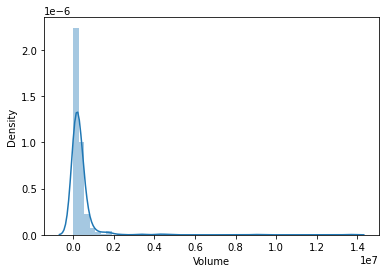

In [708]:
sns.distplot(df.Volume)

In [709]:
df.skew(axis = 0, skipna = True)

<ipython-input-709-c789b15bf834>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


Open       0.891791
High       1.087728
Low        0.760817
Close      0.863232
Volume    10.986774
dtype: float64

In [710]:
df.kurtosis(skipna = True)

<ipython-input-710-b6a0fc7ed35a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis(skipna = True)


Open        0.766037
High        1.734913
Low         0.145212
Close       0.573069
Volume    155.195548
dtype: float64

In [711]:
df.kurtosis()

<ipython-input-711-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Open        0.766037
High        1.734913
Low         0.145212
Close       0.573069
Volume    155.195548
dtype: float64

#DATA VISUALIZATION

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
sns.barplot(x='Date', y='Open',data=df, )
plt.show()

In [ ]:
sns.barplot(x='Date', y='Close',data=df, )
plt.show()

In [ ]:
sns.barplot(x='Date', y='High',data=df, )
plt.show()


In [ ]:
sns.barplot(x='Date', y='Low',data=df, )
plt.show()

In [ ]:
sns.jointplot(x = 'High', y = 'Close', data = df, kind = 'hex', gridsize = 20)

In [ ]:
sns.jointplot(x="Open", y="Close", data=df)

In [ ]:
df['Close'].plot()

In [ ]:
df['Open'].plot()

In [ ]:
df['Low'].plot()

In [ ]:
df['High'].plot()

In [ ]:
for i in range(0,5):
       sns.histplot(x = features[i],data = df)
       plt.ylabel(" number of day")
       plt.show()

In [ ]:
for i in range(0,5):
       sns.boxplot(x = features[i],data = df)
       plt.show()

In [ ]:
sns.boxplot(x="High",data=df)

In [ ]:
sns.pairplot(df,corner=True)

#FEATURE ENGINEERING

In [ ]:
for col in features:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df=df[(df[col] > lower_limit) & (df[col] < upper_limit)]
#after removing outliers
df

In [ ]:
for i in range(0,4):
       sns.boxplot(x = features[i],data = df)
       plt.ylabel(features[i])
       plt.show()

In [ ]:
df = df.fillna({
    "Open": df["Open"].mean(),
    "Close":df["Close"].mean(),
    "Low":df["Low"].mean(),
    "High":df["High"].mean(),
})

df

In [ ]:
df.describe()
df

In [ ]:
#/*
#splitted = df['Date'].str.split('-', expand=True)
#df['day'] = splitted[2].astype('int')
#df['month'] = splitted[1].astype('int')
#df['year'] = splitted[0].astype('int')
#df

In [ ]:
#encoding
#df['open-close']  = df['Open'] - df['Close']
#df['low-high']  = df['Low'] - df['High']
#df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [ ]:
#plt.pie(df['target'].value_counts().values,
#        labels=[0, 1], autopct='%1.1f%%')
#plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
#Transform
sns.displot(df,x='Close',bins=50)

In [ ]:
df['Close'].skew()

In [ ]:
df

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.dropna(axis=0,inplace=True)
feature_transform

In [ ]:
feature_transform

#1/2 BASE MODEL

In [ ]:
X=df['Open']
y=df['High']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
X_train, X_test = X_train.values, X_test.values
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print("Coefficients: ",lm.coef_)
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
sns.distplot((y_test-predictions),bins=50)

In [ ]:
y = df['Close']
X = df[['Open', 'High', 'Low', 'Volume']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
sns.distplot((y_test-predictions),bins=50)

In [ ]:
y_test.mean()

In [ ]:
predictions.mean()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_ridge=ridge_regressor.predict(X_test)
sns.distplot(y_test-prediction_ridge)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_ridge=ridge_regressor.predict(X_test)
sns.distplot(y_test-prediction_ridge)

In [ ]:
df.drop(['Date'],axis=1,inplace=True)
df

##Review 2

In [ ]:
ans=[]
for i in range(530):
    if(df.iloc[i,3]>=df.iloc[i,0]):
        ans.append(1)
    else:
        ans.append(0)
df["increase value"]=ans


In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['increase value'], axis=1)
y = df['increase value']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

##Decision tree

In [ ]:
print(x_train.shape,y_train.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
print(y_pred1)

In [ ]:
result = pd.DataFrame({'actual' : y_test ,'predicted' : y_pred1})
result

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred1)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,50))
plot_tree(model,class_names=['0','1'], feature_names=x.columns,filled=True,fontsize=15)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of Decision tree:",accuracy_score(y_test,y_pred1))

In [ ]:
from sklearn.metrics import classification_report
print("Decision tree:",classification_report(y_test, y_pred1))

##Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)
y_pred2

In [ ]:
result = pd.DataFrame({'actual' : y_test ,'predicted' : y_pred2})
result

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred2)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=['f' + str(i) for i in range(1, 11)], class_names=['0', '1'])
plt.show()

In [ ]:
print("Accuracy of random forest:",accuracy_score(y_test,y_pred2))

In [ ]:
print("random forest:",classification_report(y_test, y_pred2))

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred3= knn.predict(x_test)
y_pred3

In [ ]:
result = pd.DataFrame({'actual' : y_test ,'predicted' : y_pred3})
result

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred3)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
plt.scatter(x_test['Close'], y_pred3)
plt.show()

In [ ]:
plt.scatter(x_test['Open'], y_pred3)
plt.show()

In [ ]:
plt.scatter(x_test['Low'], y_pred3)
plt.show()

In [ ]:
plt.scatter(x_test['High'], y_pred3)
plt.show()

In [ ]:
print("Accuracy of KNN:",accuracy_score(y_test,y_pred3))

In [ ]:
print("KNN:",classification_report(y_test, y_pred3))

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred4=nb.predict(x_test)
y_pred4

In [ ]:
result = pd.DataFrame({'actual' : y_test ,'predicted' : y_pred4})
result

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred4)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
plt.scatter(x_test['Open'], y_pred5)
plt.show()

In [ ]:
plt.scatter(x_test['Close'], y_pred5)
plt.show()

In [ ]:
plt.scatter(x_test['Low'], y_pred5)
plt.show()

In [ ]:
plt.scatter(x_test['High'], y_pred5)
plt.show()

In [ ]:
print("Accuracy of Naive Bayes:",accuracy_score(y_test,y_pred4))

In [ ]:
print("KNN:",classification_report(y_test, y_pred3))

##SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred5 = svc.predict(x_test)
y_pred5

In [ ]:
result = pd.DataFrame({'actual' : y_test ,'predicted' : y_pred5})
result

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred5)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
plt.scatter(x_test['Open'], y_pred5)
plt.show()

In [ ]:
plt.scatter(x_test['Low'], y_pred5)
plt.show()

In [ ]:
plt.scatter(x_test['High'], y_pred5)
plt.show()

In [ ]:
plt.scatter(x_test['Close'], y_pred5)
plt.show()

In [ ]:
print("Accuracy of svm:",accuracy_score(y_test,y_pred5))

In [ ]:
print("svm:",classification_report(y_test, y_pred5))

##K- Means

In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=2)
model2.fit(x_train,y_train)
y_pred6 = model2.predict(x_test)
y_pred6

In [ ]:
result = pd.DataFrame({'actual' : y_test ,'predicted' : y_pred6})
result

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred6)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
sse = []
for k in range(1, 3):
    model2 = KMeans(n_clusters=k)
    model2.fit(x_train,y_train)
    sse.append(model2.inertia_)

plt.plot(range(1,3), sse)
plt.xticks(range(1,3))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
plt.scatter(x_test['Open'], y_pred6)
plt.show()

In [ ]:
plt.scatter(x_test['Close'], y_pred6)
plt.show()

In [ ]:
plt.scatter(x_test['Low'], y_pred6)
plt.show()

In [ ]:
plt.scatter(x_test['High'], y_pred6)
plt.show()

In [ ]:
print("Accuracy of K means:",accuracy_score(y_test,y_pred6))

In [ ]:
print("K means:",classification_report(y_test, y_pred6))

##Performance metric

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of Naive Bayes:",accuracy_score(y_test,y_pred4))
print("Accuracy of Decision tree:",accuracy_score(y_test,y_pred1))
print("Accuracy of random forest:",accuracy_score(y_test,y_pred2))
print("Accuracy of KNN:",accuracy_score(y_test,y_pred3))
print("Accuracy of svc:",accuracy_score(y_test,y_pred5))
print("Accuracy of K means:",accuracy_score(y_test,y_pred6))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("naive bayes")
print(confusion_matrix(y_test, y_pred4))
print("Decision tree")
print(confusion_matrix(y_test, y_pred1))
print("Random forest")
print(confusion_matrix(y_test, y_pred2))
print("Knn")
print(confusion_matrix(y_test, y_pred3))
print("SVC")
print(confusion_matrix(y_test, y_pred5))
print("K-means")
print(confusion_matrix(y_test, y_pred6))

In [ ]:

from sklearn.metrics import classification_report
print("Naive Bayes:",classification_report(y_test, y_pred4))
print("Decision tree:",classification_report(y_test, y_pred1))
print("random forest:",classification_report(y_test, y_pred2))
print("KNN:",classification_report(y_test, y_pred3))
print("svc:",classification_report(y_test, y_pred5))
print("K means:",classification_report(y_test, y_pred6))

##Decision tree  has high accuracy than other models